In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import glob
import os

from matplotlib import pyplot as plt

from sklearn import metrics

In [3]:
# Load training data and print the first three rows
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Dataset/train.csv')
data.head(3)

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE


In [4]:
# Print all categories in the class variables
data['Class'].unique()

array(['MIDDLE', 'YOUNG', 'OLD'], dtype=object)

In [5]:
# One-hot encoding for changing string values to numeric values. 
data['Class'].replace(['YOUNG', 'MIDDLE','OLD'],
                        [0, 1, 2], inplace=True)
data.head(3)

,ID,Class
0,377.jpg,1
1,17814.jpg,0
2,21283.jpg,1


In [6]:
# Methods for loading images.
def imageReader(path,ch = 3, resize=(512,512)):
	kp = tf.io.read_file(path)
	kp = tf.image.decode_jpeg(kp, channels=ch)
	kp = tf.image.convert_image_dtype(kp, dtype=tf.float32)
	kp = tf.image.resize(kp, resize)
	return kp

def load_data(image_path, label):
    image = imageReader(image_path, 3, (512,512))
    
    return (image, label)

In [7]:
# Initializing image paths variables.
image_paths = glob.glob('/content/drive/MyDrive/Colab_Notebooks/Dataset/Train/*.jpg')
print(len(image_paths))

0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19906 entries, 0 to 19905
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      19906 non-null  object
 1   Class   19906 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 311.2+ KB


In [9]:
data.sort_values(['Class'],ascending = True)

,ID,Class
4025,9917.jpg,0
5136,24895.jpg,0
9274,17361.jpg,0
12935,7012.jpg,0
9276,16771.jpg,0
...,...,...
3743,11912.jpg,2
3742,12547.jpg,2
3740,10592.jpg,2
17161,5593.jpg,2


In [10]:
import os
import shutil

In [11]:
# for _ in data:
#   if  data[data['Class']==0]:
#     current_path = "/content/drive/MyDrive/Colab_Notebooks/Dataset/Train/"+data['ID']
#     dest_path = "/content/drive/MyDrive/Colab_Notebooks/Dataset/Train/young/"+data['ID']
#     shutil.move(current_path, dest_path)
#   if data[data['Class']==1] :
#      current_path = "/content/drive/MyDrive/Colab_Notebooks/Dataset/Train/"+data['ID']
#      dest_path = "/content/drive/MyDrive/Colab_Notebooks/Dataset/Train/middle/"+data['ID']
#      shutil.move(current_path, dest_path)
#   if data[data['Class']==2] :
#     current_path = "/content/drive/MyDrive/Colab_Notebooks/Dataset/Train/"+data['ID']
#     dest_path = "/content/drive/MyDrive/Colab_Notebooks/Dataset/Train/old/"+data['ID']
#     shutil.move(current_path, dest_path) 

In [12]:
d1 = data[data['Class'] == 0]

In [13]:
d2 = data[data['Class'] == 1]

In [14]:
d3 = data[data['Class'] == 2]

In [15]:
# for i in d1['ID']:
#   current_path = "/content/drive/MyDrive/Colab_Notebooks/Dataset/Train/"+i
#   dest_path = "/content/drive/MyDrive/Colab_Notebooks/Dataset/Train/young/"+i
#   shutil.move(current_path, dest_path)

In [16]:
# for i in d1['ID']:
#   current_path = "/content/drive/MyDrive/Colab_Notebooks/Dataset/Train/"+i
#   dest_path = "/content/drive/MyDrive/Colab_Notebooks/Dataset/Train/middle/"+i
#   shutil.move(current_path, dest_path)

In [17]:
# for i in d1['ID']:
#   current_path = "/content/drive/MyDrive/Colab_Notebooks/Dataset/Train/"+i
#   dest_path = "/content/drive/MyDrive/Colab_Notebooks/Dataset/Train/old/"+i
#   shutil.move(current_path, dest_path)

In [18]:
d1.shape

(6706, 2)

In [19]:
d2.shape

(10804, 2)

In [20]:
d3.shape

(2396, 2)

In [21]:
# pip install tensorflow

Manulally editing of cotton dataset


In [22]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [23]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [24]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [25]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [26]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [27]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Colab_Notebooks/Dataset/Train/*')

In [28]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [29]:

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [30]:

# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [31]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [32]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [33]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 19322 images belonging to 3 classes.


In [34]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 599 images belonging to 3 classes.


In [36]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
604/604 [==============================] - 244s 404ms/step - loss: 1.1708 - accuracy: 0.5338 - val_loss: 1.1769 - val_accuracy: 0.4875
Epoch 2/10
604/604 [==============================] - 236s 391ms/step - loss: 1.1436 - accuracy: 0.5331 - val_loss: 1.2518 - val_accuracy: 0.5025
Epoch 3/10
604/604 [==============================] - 237s 392ms/step - loss: 1.1579 - accuracy: 0.5459 - val_loss: 1.3562 - val_accuracy: 0.4674
Epoch 4/10
604/604 [==============================] - 235s 390ms/step - loss: 1.1653 - accuracy: 0.5406 - val_loss: 1.2839 - val_accuracy: 0.4875
Epoch 5/10
604/604 [==============================] - 234s 388ms/step - loss: 1.1277 - accuracy: 0.5428 - val_loss: 0.9509 - val_accuracy: 0.5710
Epoch 6/10
604/604 [==============================] - 235s 390ms/step - loss: 1.1501 - accuracy: 0.5496 - val_loss: 1.5646 - val_accuracy: 0.5225
Epoch 7/10
604/604 [==============================] - 234s 388ms/step - loss: 1.1709 - accuracy: 0.5459 - val_loss: 0.9628 -

In [37]:
import matplotlib.pyplot as plt

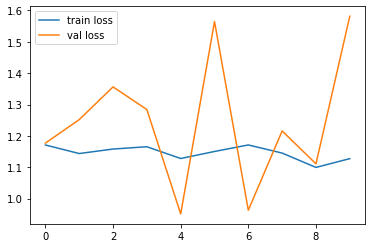

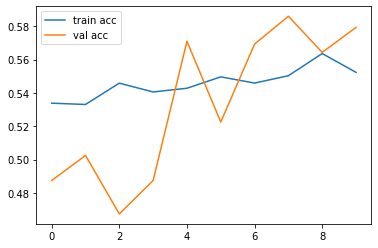

<Figure size 432x288 with 0 Axes>

In [38]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [39]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [40]:
y_pred = model.predict(test_set)

19/19 [==============================] - 5s 121ms/step


In [41]:
y_pred


array([[8.1144679e-01, 2.4775535e-04, 1.8830545e-01],
       [2.9307076e-01, 7.8590699e-03, 6.9907016e-01],
       [3.5766533e-01, 4.8473105e-04, 6.4184994e-01],
       ...,
       [6.4099807e-01, 5.8225766e-03, 3.5317937e-01],
       [9.1790622e-01, 3.2512662e-03, 7.8842558e-02],
       [2.1512898e-02, 3.5021326e-06, 9.7848356e-01]], dtype=float32)

In [42]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [43]:
y_pred

array([0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0,

In [44]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [45]:
model=load_model('model_resnet50.h5')

NameError: ignored